## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf

from tqdm.notebook import tqdm


%matplotlib inline
#matplotlib.rcParams['figure.facecolor'] = '#ffffff'

#ignoring warning
import warnings
warnings.filterwarnings('ignore')

data_dir = "/content/drive/MyDrive/Colab Notebooks/Driver's_Drowsiness_Detection_Collab/dataset"

## Loading data files

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Exploring Datasets

In [3]:
print(os.listdir(data_dir))
train_classes = os.listdir(data_dir + "/train")
print(train_classes)
test_classes = os.listdir(data_dir + "/test")
print(test_classes)

['train', 'test']
['Closed', 'Open', 'yawn', 'no_yawn']
['no_yawn', 'Closed', 'Open', 'yawn']


In [4]:
train_images = 0
for i in range(len(train_classes)):
  s = train_classes[i] + '_images'
  s = os.listdir(data_dir + "/train/" + train_classes[i])
  print('No. of training examples for', train_classes[i], ': ', len(s))
  train_images += len(s)

print("\n\nTotal no. of training images : ",train_images)

No. of training examples for Closed :  617
No. of training examples for Open :  617
No. of training examples for yawn :  617
No. of training examples for no_yawn :  616


Total no. of training images :  2467


In [5]:
test_images = 0
for i in range(len(test_classes)):
  s = test_classes[i] + '_images'
  s = os.listdir(data_dir + "/test/" + test_classes[i])
  print('No. of testing dataset examples for', test_classes[i], ': ', len(s))
  test_images += len(s)

print("\n\nTotal no. of test images : ",test_images)

No. of testing dataset examples for no_yawn :  109
No. of testing dataset examples for Closed :  109
No. of testing dataset examples for Open :  109
No. of testing dataset examples for yawn :  106


Total no. of test images :  433


### Function to showing one image for each training class

In [6]:
def show_image(image_folder_path):
  for i in range(len(train_classes)):
    s = os.listdir(image_folder_path + '/' + test_classes[i])
    for j in range(len(s)):
      image_path  = image_folder_path + test_classes[i] +'/'+ s[j]
      image=plt.imread(image_path)
      fig=plt.figure(figsize=(4,4))
      plt.imshow(image)
      break
    continue

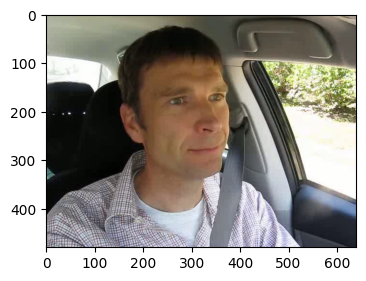

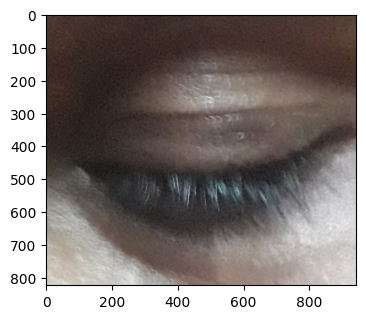

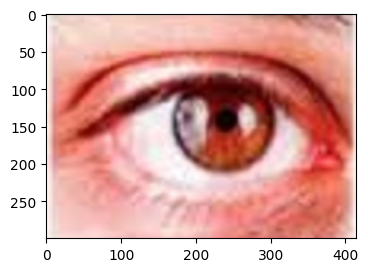

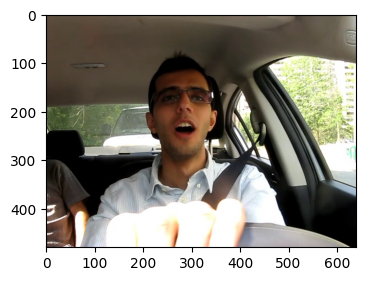

In [7]:
show_image(data_dir+'/train/')

## Data Pre-processing

### function to load images

In [8]:
def load_images(directory):
    images = []
    labels = []

    for category in os.listdir(directory):
        for filename in tqdm(os.listdir(directory+category)):
            image_path = os.path.join(directory,category,filename)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
            image = cv2.resize(image,(224,224))
            images.append(image)
            labels.append(category)

    images = np.array(images,dtype='float32')
    return images, labels

In [9]:
print('*******Loading Train Data*******')
train_ds = load_images(data_dir + '/train/' )

print('*******Loading Test Data*******')
test_ds = load_images(data_dir + '/test/')

*******Loading Train Data*******


  0%|          | 0/617 [00:00<?, ?it/s]

  0%|          | 0/617 [00:00<?, ?it/s]

  0%|          | 0/617 [00:00<?, ?it/s]

  0%|          | 0/616 [00:00<?, ?it/s]

*******Loading Test Data*******


  0%|          | 0/109 [00:00<?, ?it/s]

  0%|          | 0/109 [00:00<?, ?it/s]

  0%|          | 0/109 [00:00<?, ?it/s]

  0%|          | 0/106 [00:00<?, ?it/s]

In [10]:
X_train,y_train = train_ds
X_test,y_test =  test_ds

In [11]:
X_train.shape

(2467, 224, 224, 3)

In [12]:
X_test.shape

(433, 224, 224, 3)

### Normalizing the dataset

In [13]:
from tensorflow.keras import layers

In [14]:
layer = layers.Normalization()
layer.adapt(X_train)
X_train = layer(X_train)

In [15]:
layer = layers.Normalization()
layer.adapt(X_test)
X_test = layer(X_test)

### Label enconding

In [16]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

encoder = LabelEncoder()

In [17]:
type(y_train)

list

In [18]:
y_train_ = encoder.fit_transform(y_train)
ytrain_map = dict(zip(y_train, y_train_))  # get the mapping between the original labels and encoded labels

In [19]:
y_train_

array([0, 0, 0, ..., 2, 2, 2])

In [20]:
y_train_.shape

(2467,)

In [21]:
print(ytrain_map)

{'Closed': 0, 'Open': 1, 'yawn': 3, 'no_yawn': 2}


In [22]:
y_test_ = encoder.fit_transform(y_test)
ytest_map = dict(zip(y_test, y_test_))  # get the mapping between the original labels and encoded labels

In [23]:
y_test_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [24]:
y_test_.shape

(433,)

In [25]:
y_train = to_categorical(y_train_)
y_test = to_categorical(y_test_)

In [26]:
y_train

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [27]:
y_train.shape

(2467, 4)

## Building Models

### 1. Pretrained models

#### a. VGG19

In [46]:
from tensorflow.keras.applications import VGG19

vgg_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in vgg_model.layers:
    layer.trainable = False

top_layer = tf.keras.layers.GlobalAveragePooling2D()(vgg_model.output)
top_layer = tf.keras.layers.Dense(4, activation='softmax')(top_layer)

vgg_model = tf.keras.models.Model(inputs=vgg_model.input, outputs=top_layer)

80134624/80134624 [==============================] - 0s 0us/step


In [47]:
vgg_model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision(name='precision'),
                tf.keras.metrics.Recall(name='recall'),
                tf.keras.metrics.AUC(
                    name="auc", multi_label=True, num_labels=4, from_logits=False, label_weights=None),])

#### Prepare callbacks

In [32]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [49]:
early_stopping = EarlyStopping(monitor='val_accuracy',patience=20,mode='max',
                                                        verbose=1,restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',patience=5,mode='max',verbose=1,factor=0.1,min_lr=0.001)
checkpoint_filename = 'checkpoint/'
model_checkpoint = ModelCheckpoint(filepath=checkpoint_filename,
                    monitor='val_accuracy',verbose=1,save_best_only=True,save_weights_only=True,mode='max')

callbacks = [early_stopping, reduce_lr, model_checkpoint]

In [50]:
# Train the model
history = vgg_model.fit(x=X_train,
            y=y_train,
            epochs=100,
            batch_size=16,
            validation_data=(X_test,y_test),
            callbacks=callbacks,
            )

Epoch 1/100
155/155 [==============================] - ETA: 0s - loss: 0.7533 - accuracy: 0.7236 - precision: 0.8497 - recall: 0.4491 - auc: 0.9248
Epoch 1: val_accuracy improved from -inf to 0.79677, saving model to checkpoint/
155/155 [==============================] - 24s 126ms/step - loss: 0.7533 - accuracy: 0.7236 - precision: 0.8497 - recall: 0.4491 - auc: 0.9248 - val_loss: 0.5543 - val_accuracy: 0.7968 - val_precision: 0.8575 - val_recall: 0.6952 - val_auc: 0.9473 - lr: 0.0010
Epoch 2/100
154/155 [============================>.] - ETA: 0s - loss: 0.4806 - accuracy: 0.8080 - precision: 0.8307 - recall: 0.7768 - auc: 0.9571
Epoch 2: val_accuracy improved from 0.79677 to 0.80831, saving model to checkpoint/
155/155 [==============================] - 15s 98ms/step - loss: 0.4806 - accuracy: 0.8083 - precision: 0.8309 - recall: 0.7767 - auc: 0.9570 - val_loss: 0.4490 - val_accuracy: 0.8083 - val_precision: 0.8338 - val_recall: 0.7644 - val_auc: 0.9605 - lr: 0.0010
Epoch 3/100
154/15

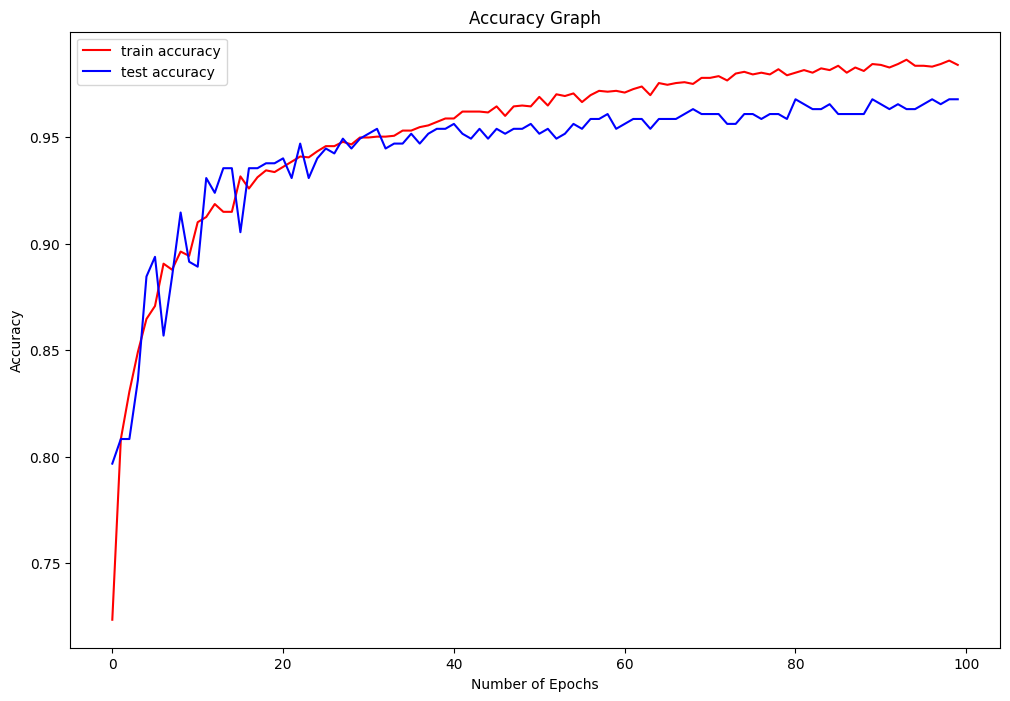

In [51]:
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'],'r',label='train accuracy')
plt.plot(history.history['val_accuracy'],'b',label='test accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.legend()

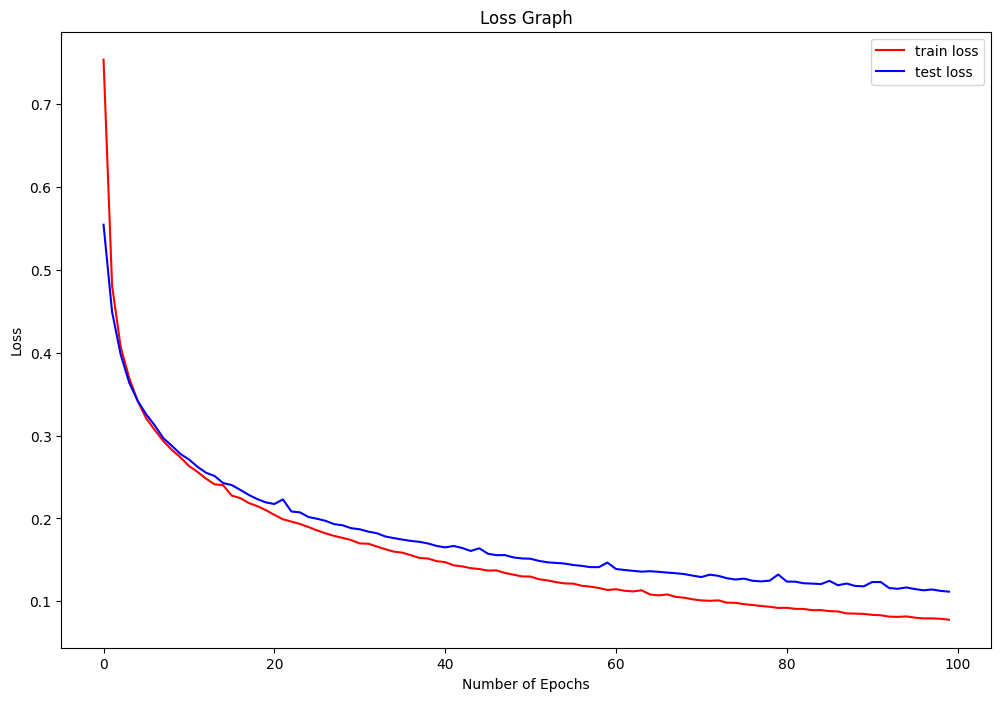

In [52]:
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'],'r',label='train loss')
plt.plot(history.history['val_loss'],'b',label='test loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Loss Graph')
plt.legend()

### Predicting on test dataset

In [82]:
y_preds = vgg_model.predict(X_test)
print(y_preds)

14/14 [==============================] - 2s 142ms/step
[[2.14151942e-06 1.00957213e-05 8.56773257e-01 1.43214509e-01]
 [3.93372238e-06 1.41715390e-07 9.44376230e-01 5.56196906e-02]
 [9.57464799e-05 1.10814405e-07 8.49311173e-01 1.50592953e-01]
 ...
 [2.11503448e-06 1.67206440e-06 4.78428863e-02 9.52153325e-01]
 [5.62451169e-06 6.51245000e-06 2.86150694e-01 7.13837147e-01]
 [9.13220859e-08 2.78643739e-07 8.29106139e-05 9.99916673e-01]]


In [83]:
max_indices = np.argmax(y_preds, axis=1)

# Create a one-hot encoding matrix
one_hot_matrix = np.zeros(y_preds.shape)
one_hot_matrix[np.arange(len(max_indices)), max_indices] = 1

print(one_hot_matrix)

[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [84]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report, accuracy_score

In [85]:
# Convert one-hot encoded labels to categorical labels
y_pred_categorical = np.argmax(one_hot_matrix, axis=1)
y_test_categorical = np.argmax(y_test, axis=1)

y_pred_categorical.shape

(433,)

In [86]:
y_test_categorical.shape

(433,)

In [87]:
# Generate the classification report
report = classification_report(y_test_categorical, y_pred_categorical, target_names = ['Closed', 'Open', 'no_yawn', 'yawn'])

# Print the report
print(report)

print(accuracy_score(y_test_categorical, y_pred_categorical))

              precision    recall  f1-score   support

      Closed       0.97      0.99      0.98       109
        Open       0.99      0.97      0.98       109
     no_yawn       0.95      0.95      0.95       109
        yawn       0.95      0.95      0.95       106

    accuracy                           0.97       433
   macro avg       0.97      0.97      0.97       433
weighted avg       0.97      0.97      0.97       433

0.9676674364896074


In [88]:
target_names = ['Closed', 'Open', 'no_yawn', 'yawn']

Confusion Matrix is
 [[108   1   0   0]
 [  3 106   0   0]
 [  0   0 104   5]
 [  0   0   5 101]]


<Figure size 640x480 with 0 Axes>

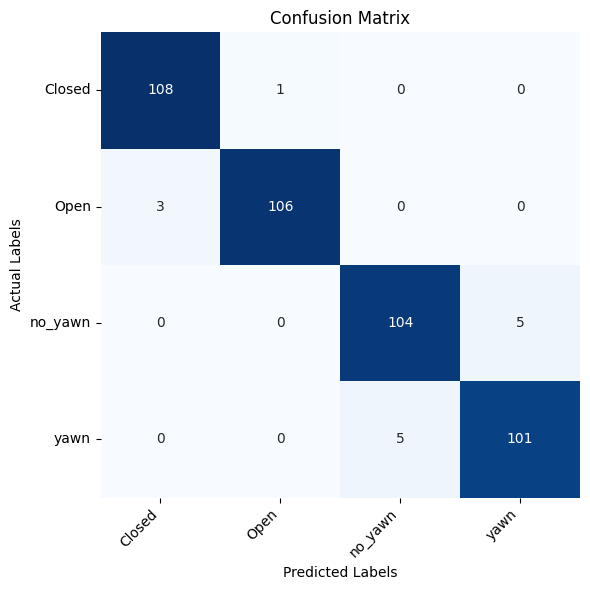

In [89]:
import seaborn as sns

CM = confusion_matrix(y_test_categorical, y_pred_categorical)

plt.clf()
plt.figure(figsize=(6, 6))
sns.heatmap(CM, annot=True, fmt="d", cmap="Blues",
            xticklabels=target_names, yticklabels=target_names, cbar=False)
plt.title(f'Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

print('Confusion Matrix is\n', CM)

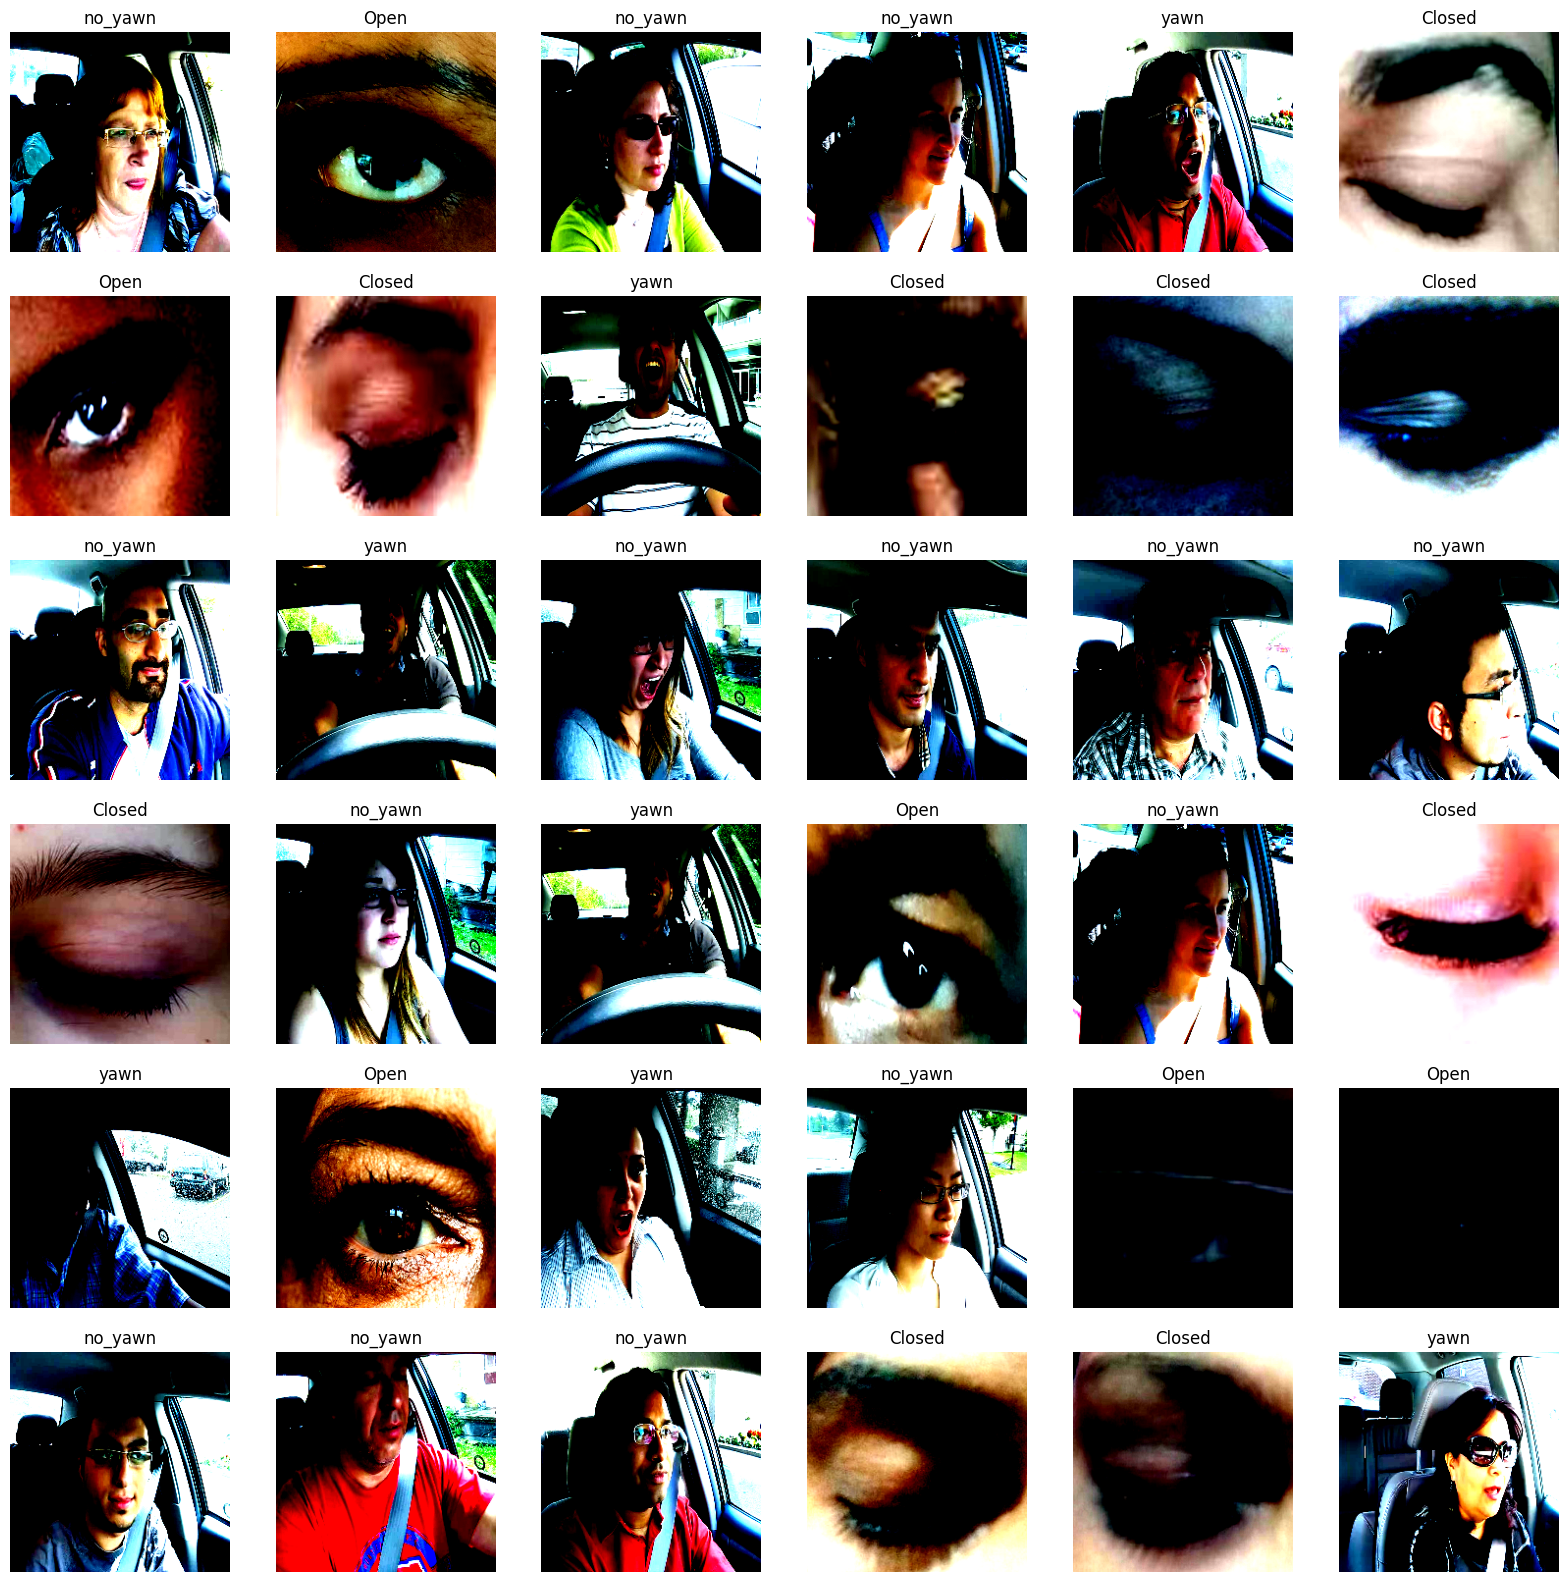

In [90]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) :
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(target_names[y_pred_categorical[i]])

In [91]:
vgg_model.save("vgg19_drowsiness.keras")

#### b. MobileNetV2

In [28]:
from tensorflow.keras.applications import MobileNetV2

mobilenet_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in mobilenet_model.layers:
    layer.trainable = False

top_layer = tf.keras.layers.GlobalAveragePooling2D()(mobilenet_model.output)
top_layer = tf.keras.layers.Dense(4, activation='softmax')(top_layer)

mobilenet_model = tf.keras.models.Model(inputs=mobilenet_model.input, outputs=top_layer)

In [29]:
mobilenet_model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision(name='precision'),
                tf.keras.metrics.Recall(name='recall'),
                tf.keras.metrics.AUC(
                    name="auc", multi_label=True, num_labels=4, from_logits=False, label_weights=None),])

In [33]:
early_stopping = EarlyStopping(monitor='val_accuracy',patience=20,mode='max',
                                                        verbose=1,restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',patience=5,mode='max',verbose=1,factor=0.1,min_lr=0.001)
checkpoint_filename = 'mobilenet_checkpoint/'
model_checkpoint = ModelCheckpoint(filepath=checkpoint_filename,
                    monitor='val_accuracy',verbose=1,save_best_only=True,save_weights_only=True,mode='max')

callbacks = [early_stopping, reduce_lr, model_checkpoint]

In [34]:
# Train the model
history = mobilenet_model.fit(x=X_train,
            y=y_train,
            epochs=100,
            batch_size=16,
            validation_data=(X_test,y_test),
            callbacks=callbacks,
            )

Epoch 1/100
155/155 [==============================] - ETA: 0s - loss: 0.3981 - accuracy: 0.8164 - precision: 0.8309 - recall: 0.8006 - auc: 0.9580
Epoch 1: val_accuracy improved from -inf to 0.89376, saving model to mobilenet_checkpoint/
155/155 [==============================] - 25s 50ms/step - loss: 0.3981 - accuracy: 0.8164 - precision: 0.8309 - recall: 0.8006 - auc: 0.9580 - val_loss: 0.2513 - val_accuracy: 0.8938 - val_precision: 0.8938 - val_recall: 0.8938 - val_auc: 0.9814 - lr: 0.0010
Epoch 2/100
155/155 [==============================] - ETA: 0s - loss: 0.2026 - accuracy: 0.9193 - precision: 0.9200 - recall: 0.9181 - auc: 0.9881
Epoch 2: val_accuracy did not improve from 0.89376
155/155 [==============================] - 5s 34ms/step - loss: 0.2026 - accuracy: 0.9193 - precision: 0.9200 - recall: 0.9181 - auc: 0.9881 - val_loss: 0.2196 - val_accuracy: 0.8868 - val_precision: 0.8868 - val_recall: 0.8868 - val_auc: 0.9909 - lr: 0.0010
Epoch 3/100
153/155 [======================

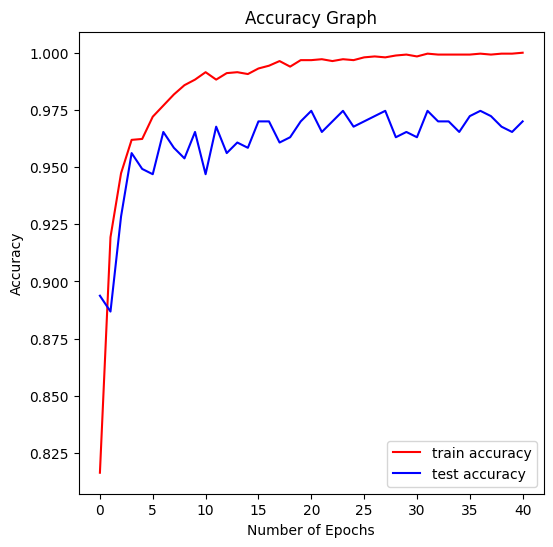

In [35]:
plt.figure(figsize=(6,6))
plt.plot(history.history['accuracy'],'r',label='train accuracy')
plt.plot(history.history['val_accuracy'],'b',label='test accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.legend()

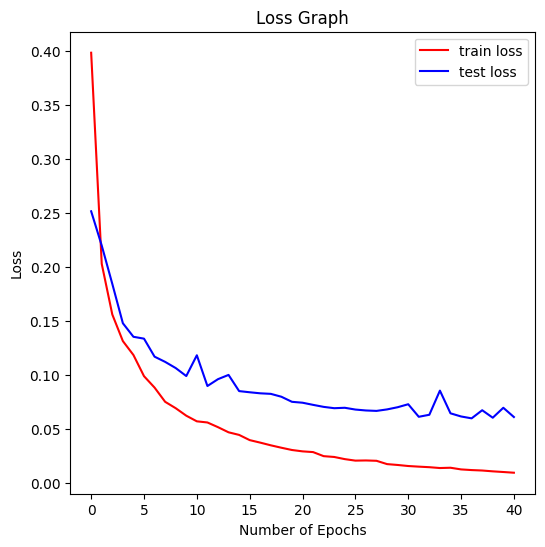

In [36]:
plt.figure(figsize=(6,6))
plt.plot(history.history['loss'],'r',label='train loss')
plt.plot(history.history['val_loss'],'b',label='test loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Loss Graph')
plt.legend()

### Predicting on test dataset

In [38]:
y_preds = mobilenet_model.predict(X_test)
print(y_preds)

14/14 [==============================] - 4s 100ms/step
[[5.7983375e-06 7.5030339e-06 5.6083268e-01 4.3915400e-01]
 [4.2202096e-06 2.7130957e-06 8.2048708e-01 1.7950605e-01]
 [2.0124771e-04 2.5222060e-05 9.5004147e-01 4.9732041e-02]
 ...
 [1.4137559e-06 3.6762126e-06 6.2869145e-03 9.9370801e-01]
 [6.1892142e-06 5.0063096e-05 1.4661038e-02 9.8528266e-01]
 [1.2089960e-09 8.9737460e-07 6.5000171e-07 9.9999845e-01]]


In [39]:
max_indices = np.argmax(y_preds, axis=1)

# Create a one-hot encoding matrix
one_hot_matrix = np.zeros(y_preds.shape)
one_hot_matrix[np.arange(len(max_indices)), max_indices] = 1

print(one_hot_matrix)

[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [40]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report, accuracy_score

In [41]:
# Convert one-hot encoded labels to categorical labels
y_pred_categorical = np.argmax(one_hot_matrix, axis=1)
y_test_categorical = np.argmax(y_test, axis=1)

y_pred_categorical.shape

(433,)

In [42]:
y_test_categorical.shape

(433,)

In [44]:
# Generate the classification report
report = classification_report(y_test_categorical, y_pred_categorical, target_names = ['Closed', 'Open', 'no_yawn', 'yawn'])

# Print the report
print(report)

print(accuracy_score(y_test_categorical, y_pred_categorical))

              precision    recall  f1-score   support

      Closed       0.99      0.98      0.99       109
        Open       0.98      0.99      0.99       109
     no_yawn       0.97      0.95      0.96       109
        yawn       0.95      0.97      0.96       106

    accuracy                           0.97       433
   macro avg       0.97      0.97      0.97       433
weighted avg       0.97      0.97      0.97       433

0.9745958429561201


In [45]:
target_names = ['Closed', 'Open', 'no_yawn', 'yawn']

Confusion Matrix is
 [[107   2   0   0]
 [  1 108   0   0]
 [  0   0 104   5]
 [  0   0   3 103]]


<Figure size 640x480 with 0 Axes>

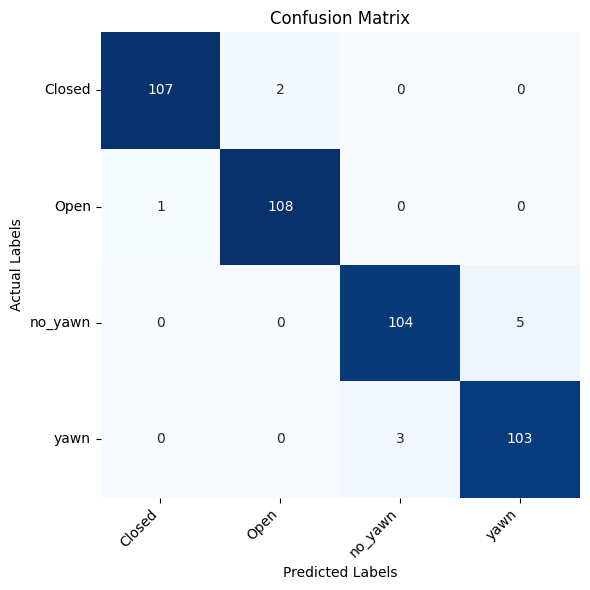

In [46]:
import seaborn as sns

CM = confusion_matrix(y_test_categorical, y_pred_categorical)

plt.clf()
plt.figure(figsize=(6, 6))
sns.heatmap(CM, annot=True, fmt="d", cmap="Blues",
            xticklabels=target_names, yticklabels=target_names, cbar=False)
plt.title(f'Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

print('Confusion Matrix is\n', CM)

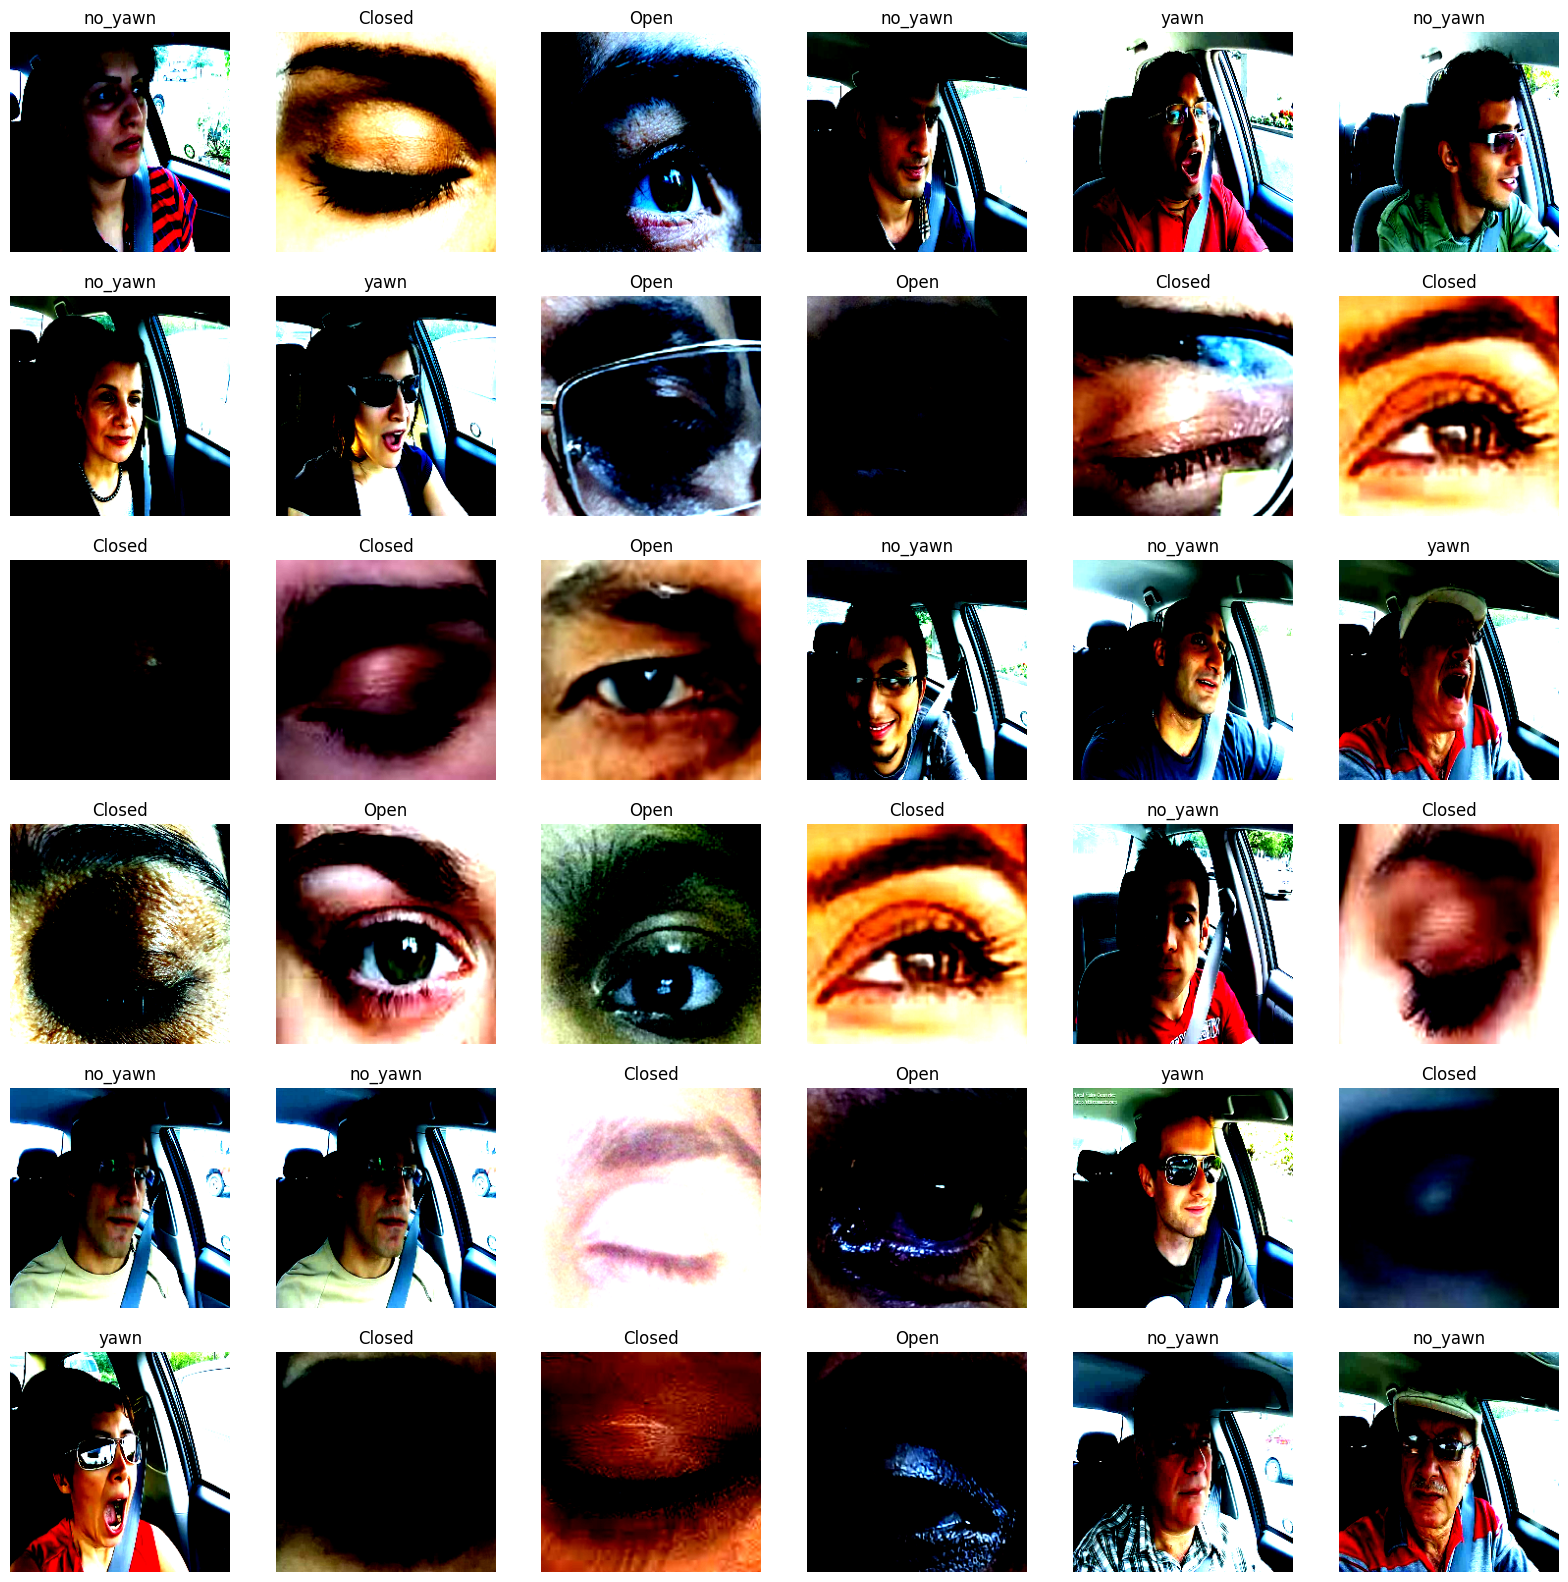

In [47]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) :
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(target_names[y_pred_categorical[i]])

In [48]:
mobilenet_model.save("mobilenetv2_drowsiness.keras")

#### c. Custom Model

In [49]:
custom_model = tf.keras.models.Sequential([

  layers.Conv2D(filters=16,kernel_size=3,activation='relu',input_shape=(224,224,3)),
  layers.MaxPooling2D(pool_size=2),

  layers.Conv2D(filters=32,kernel_size=3,activation='relu',padding='same'),
  layers.MaxPooling2D(pool_size=2),
  layers.BatchNormalization(),
  layers.Dropout(0.5),

  layers.Conv2D(filters=64,kernel_size=3,activation='relu'),
  layers.MaxPooling2D(pool_size=2),
  layers.BatchNormalization(),
  layers.Dropout(0.2),

  layers.Conv2D(filters=128,kernel_size=3,activation='relu'),
  layers.MaxPooling2D(pool_size=2),
  layers.BatchNormalization(),
  layers.Dropout(0.25),

  layers.Flatten(),

  layers.Dense(units=128,activation='relu'),
  layers.BatchNormalization(),
  layers.Dropout(0.25),

  layers.Dense(units=4,activation='softmax')
])

In [50]:
custom_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 111, 111, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 55, 55, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 55, 55, 32)        128       
 Normalization)                                                  
                                                        

In [51]:
custom_model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision(name='precision'),
                tf.keras.metrics.Recall(name='recall'),
                tf.keras.metrics.AUC(
                    name="auc", multi_label=True, num_labels=4, from_logits=False, label_weights=None),])

In [52]:
early_stopping = EarlyStopping(monitor='val_accuracy',patience=20,mode='max',
                                                        verbose=1,restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',patience=5,mode='max',verbose=1,factor=0.1,min_lr=0.001)
checkpoint_filename = 'custom_model_checkpoint/'
model_checkpoint = ModelCheckpoint(filepath=checkpoint_filename,
                    monitor='val_accuracy',verbose=1,save_best_only=True,save_weights_only=True,mode='max')

callbacks = [early_stopping, reduce_lr, model_checkpoint]

In [53]:
# Train the model
history = custom_model.fit(x=X_train,
            y=y_train,
            epochs=100,
            batch_size=16,
            validation_data=(X_test,y_test),
            callbacks=callbacks,
            )

Epoch 1/100
155/155 [==============================] - ETA: 0s - loss: 0.6037 - accuracy: 0.7377 - precision: 0.7433 - recall: 0.7313 - auc: 0.9334
Epoch 1: val_accuracy improved from -inf to 0.31178, saving model to custom_model_checkpoint/
155/155 [==============================] - 15s 36ms/step - loss: 0.6037 - accuracy: 0.7377 - precision: 0.7433 - recall: 0.7313 - auc: 0.9334 - val_loss: 4.1234 - val_accuracy: 0.3118 - val_precision: 0.3118 - val_recall: 0.3118 - val_auc: 0.6793 - lr: 0.0010
Epoch 2/100
154/155 [============================>.] - ETA: 0s - loss: 0.3751 - accuracy: 0.8312 - precision: 0.8337 - recall: 0.8304 - auc: 0.9680
Epoch 2: val_accuracy improved from 0.31178 to 0.40416, saving model to custom_model_checkpoint/
155/155 [==============================] - 5s 33ms/step - loss: 0.3765 - accuracy: 0.8306 - precision: 0.8331 - recall: 0.8298 - auc: 0.9679 - val_loss: 3.7391 - val_accuracy: 0.4042 - val_precision: 0.4042 - val_recall: 0.4042 - val_auc: 0.6756 - lr: 0

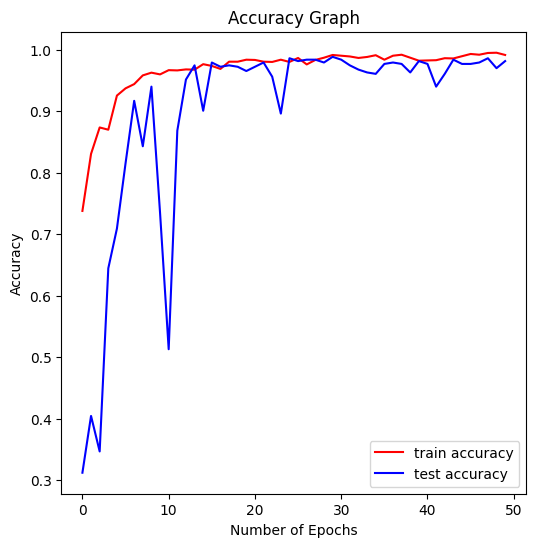

In [54]:
plt.figure(figsize=(6,6))
plt.plot(history.history['accuracy'],'r',label='train accuracy')
plt.plot(history.history['val_accuracy'],'b',label='test accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.legend()

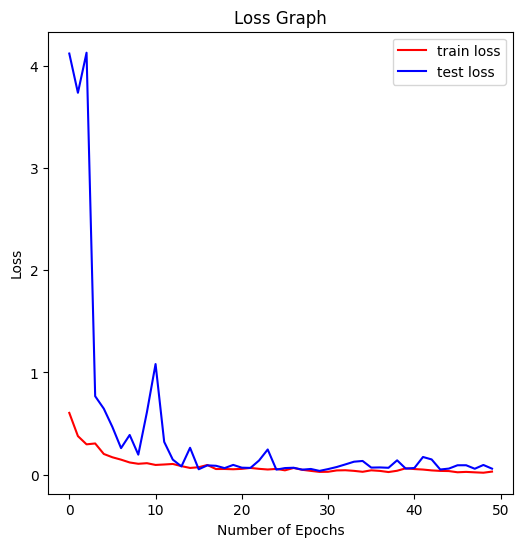

In [55]:
plt.figure(figsize=(6,6))
plt.plot(history.history['loss'],'r',label='train loss')
plt.plot(history.history['val_loss'],'b',label='test loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Loss Graph')
plt.legend()

In [57]:
y_preds = custom_model.predict(X_test)
print(y_preds)

14/14 [==============================] - 2s 50ms/step
[[7.20370299e-05 1.05820945e-04 9.99775708e-01 4.65196063e-05]
 [1.49947987e-03 3.02633816e-06 9.98004377e-01 4.93181054e-04]
 [3.29001341e-04 3.72185110e-04 9.99027133e-01 2.71593453e-04]
 ...
 [1.12309135e-06 2.28953468e-05 1.65467065e-06 9.99974370e-01]
 [4.46605372e-05 2.27831297e-05 2.48115393e-04 9.99684453e-01]
 [2.73145702e-06 7.69231792e-06 2.73186083e-06 9.99986887e-01]]


In [58]:
max_indices = np.argmax(y_preds, axis=1)

# Create a one-hot encoding matrix
one_hot_matrix = np.zeros(y_preds.shape)
one_hot_matrix[np.arange(len(max_indices)), max_indices] = 1

print(one_hot_matrix)

[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [59]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report, accuracy_score

In [60]:
# Convert one-hot encoded labels to categorical labels
y_pred_categorical = np.argmax(one_hot_matrix, axis=1)
y_test_categorical = np.argmax(y_test, axis=1)

y_pred_categorical.shape

(433,)

In [61]:
y_test_categorical.shape

(433,)

In [62]:
# Generate the classification report
report = classification_report(y_test_categorical, y_pred_categorical, target_names = ['Closed', 'Open', 'no_yawn', 'yawn'])

# Print the report
print(report)

print(accuracy_score(y_test_categorical, y_pred_categorical))

              precision    recall  f1-score   support

      Closed       0.96      1.00      0.98       109
        Open       1.00      0.96      0.98       109
     no_yawn       0.99      1.00      1.00       109
        yawn       1.00      0.99      1.00       106

    accuracy                           0.99       433
   macro avg       0.99      0.99      0.99       433
weighted avg       0.99      0.99      0.99       433

0.9884526558891455


In [63]:
target_names = ['Closed', 'Open', 'no_yawn', 'yawn']

Confusion Matrix is
 [[109   0   0   0]
 [  4 105   0   0]
 [  0   0 109   0]
 [  0   0   1 105]]


<Figure size 640x480 with 0 Axes>

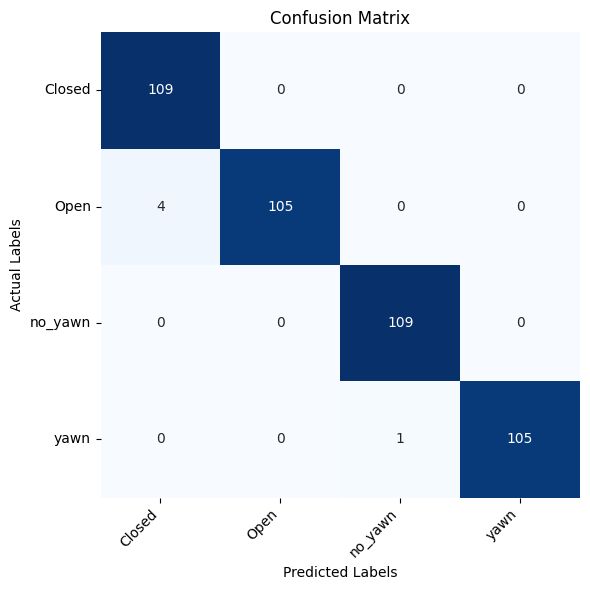

In [64]:
import seaborn as sns

CM = confusion_matrix(y_test_categorical, y_pred_categorical)

plt.clf()
plt.figure(figsize=(6, 6))
sns.heatmap(CM, annot=True, fmt="d", cmap="Blues",
            xticklabels=target_names, yticklabels=target_names, cbar=False)
plt.title(f'Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

print('Confusion Matrix is\n', CM)

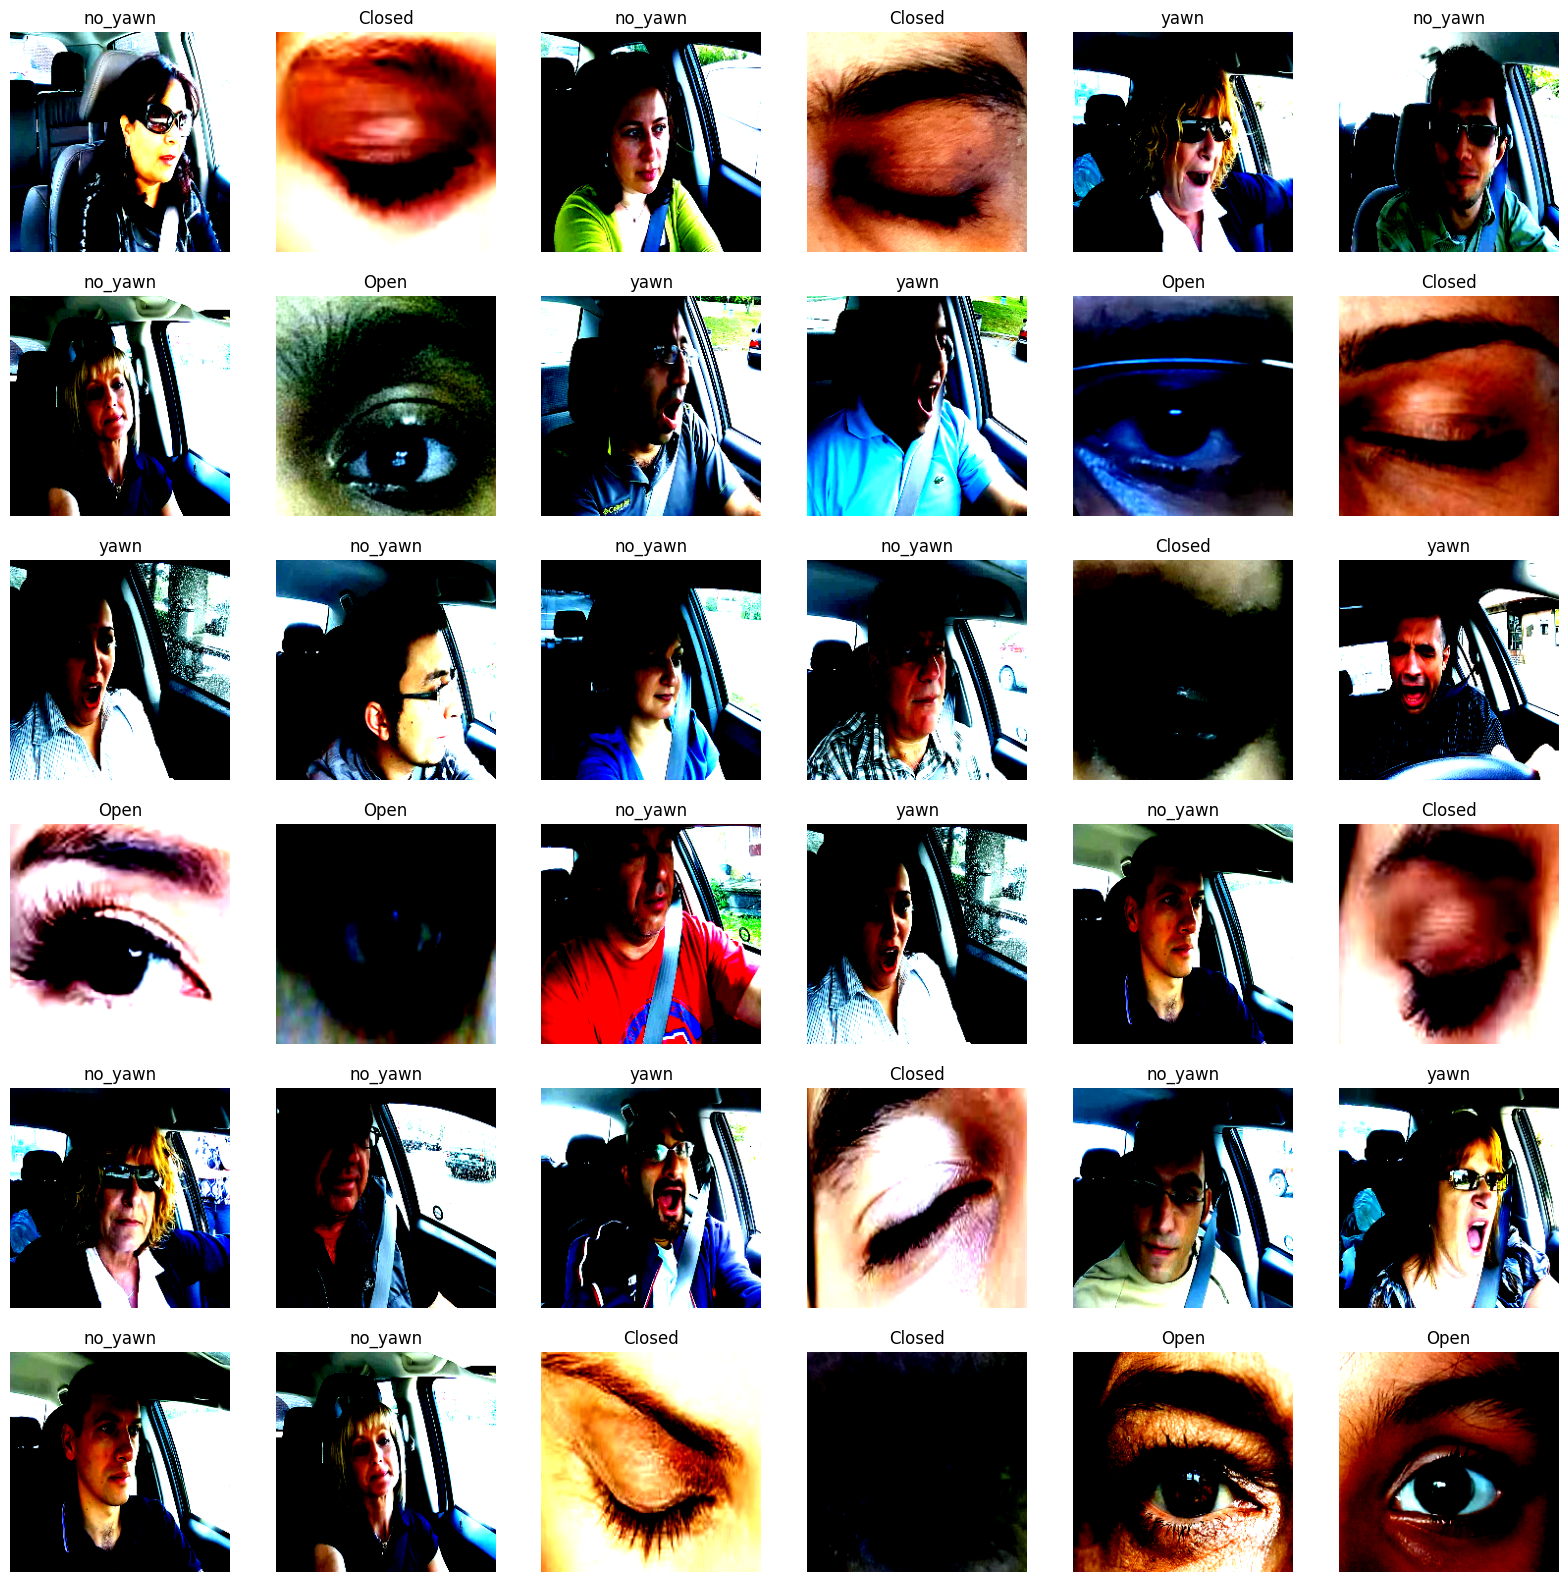

In [65]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) :
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(target_names[y_pred_categorical[i]])

In [66]:
custom_model.save("custom_model_drowsiness.keras")